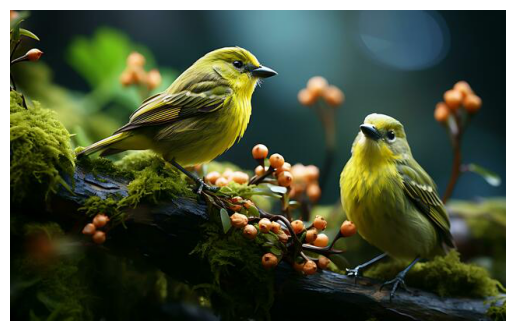

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

# Read the image
image_path = r"C:\Users\Lenovo\Pictures\birds.jpg"
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

# Save the image
save_path = r"C:\Users\Lenovo\Pictures\birds.jpg"
image.save(save_path)

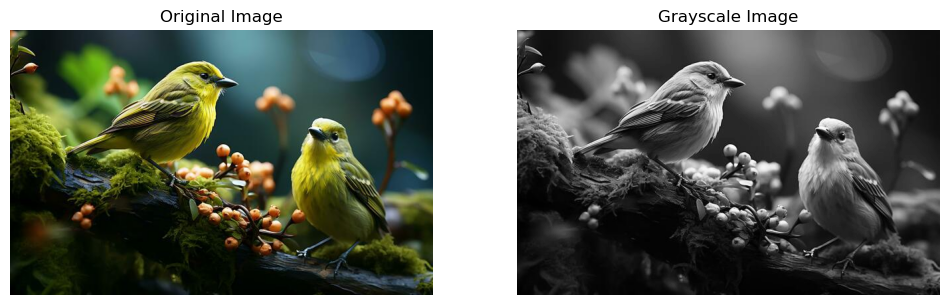

In [13]:
import cv2
import matplotlib.pyplot as plt

# Define the path to the image
image_path = r"C:\Users\Lenovo\Pictures\birds.jpg"

# Load the image in RGB format
# OpenCV loads images in BGR format by default, so we need to convert it to RGB
image_bgr = cv2.imread(image_path)

# Check if the image was loaded successfully
if image_bgr is None:
    print("Error: Could not load image. Check the file path.")
else:
    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Convert the RGB image to grayscale
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

    # Display the original RGB image
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes

    # Display the grayscale image
    plt.subplot(1, 2, 2)
    plt.title('Grayscale Image')
    plt.imshow(image_gray, cmap='gray')
    plt.axis('off')  # Hide axes

    plt.show()

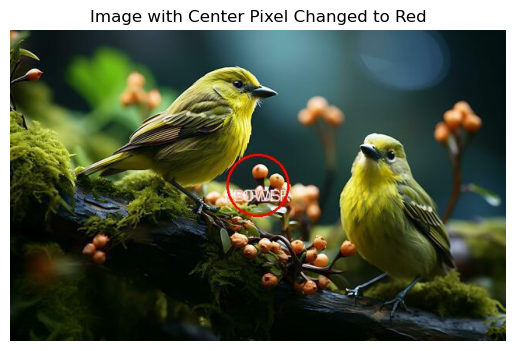

In [1]:
import cv2
import matplotlib.pyplot as plt

# Define the path to the image
image_path = r"C:\Users\Lenovo\Pictures\birds.jpg"
# Load the image in BGR format
image_bgr = cv2.imread(image_path)

# Check if the image was loaded successfully
if image_bgr is None:
    print("Error: Could not load image. Check the file path.")
else:
    # Get image dimensions
    height, width, _ = image_bgr.shape

    # Calculate the coordinates of the center pixel
    center_x, center_y = width // 2, height // 2

    # Change the center pixel color to red (BGR format)
    image_bgr[center_y, center_x] = [0, 0, 255]

    # Convert BGR image to RGB for display
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Display the modified image
    plt.imshow(image_rgb)
    plt.title('Image with Center Pixel Changed to Red')
    plt.axis('off')  # Hide axes
    plt.show()

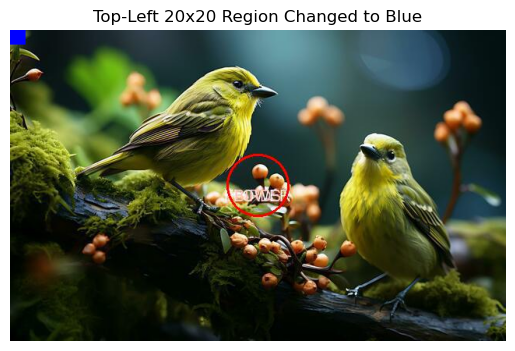

In [3]:
import cv2
import matplotlib.pyplot as plt

# Define the path to the image
image_path = r"C:\Users\Lenovo\Pictures\birds.jpg"

# Load the image in BGR format
image_bgr = cv2.imread(image_path)

# Check if the image was loaded successfully
if image_bgr is None:
    print("Error: Could not load image. Check the file path.")
else:
    # Define the size of the region
    region_size = 20

    # Get image dimensions
    height, width, _ = image_bgr.shape

    # Ensure the region fits within the image dimensions
    if region_size > height or region_size > width:
        print("Error: The specified region size exceeds image dimensions.")
    else:
        # Define the top-left corner of the region
        top_left_x, top_left_y = 0, 0

        # Define the bottom-right corner of the region
        bottom_right_x = top_left_x + region_size
        bottom_right_y = top_left_y + region_size

        # Set the region to blue (BGR format: [255, 0, 0])
        image_bgr[top_left_y:bottom_right_y, top_left_x:bottom_right_x] = [255, 0, 0]

        # Convert BGR image to RGB for display
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

        # Display the modified image
        plt.imshow(image_rgb)
        plt.title('Top-Left 20x20 Region Changed to Blue')
        plt.axis('off')  # Hide axes
        plt.show()

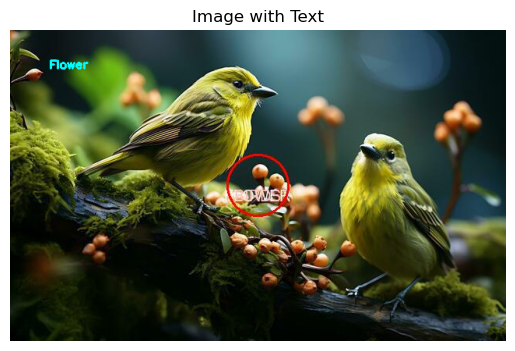

In [2]:
import cv2
import matplotlib.pyplot as plt

# Define the path to the image
image_path = r"C:\Users\Lenovo\Pictures\birds.jpg"

# Load the image in BGR format
image_bgr = cv2.imread(image_path)

# Check if the image was loaded successfully
if image_bgr is None:
    print("Error: Could not load image. Check the file path.")
else:
    # Define text parameters
    text = "Flower"
    position = (50, 50)  # Position (x, y) where the text will start
    font_scale = 0.5      # Scale factor for the font size
    font_color = (255, 255, 0)  # Font color in BGR format (green)
    font_thickness = 2     # Thickness of the font stroke
    font_type = cv2.FONT_HERSHEY_SIMPLEX  # Font type

    # Add text to the image
    cv2.putText(
        image_bgr,              # Image
        text,                  # Text to display
        position,              # Position of the text (bottom-left corner)
        font_type,             # Font type
        font_scale,            # Font scale (size)
        font_color,            # Font color (BGR format)
        font_thickness         # Thickness of the font stroke
    )

    # Convert BGR image to RGB for display
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Display the image with the text
    plt.imshow(image_rgb)
    plt.title('Image with Text')
    plt.axis('off')  # Hide axes
    plt.show()

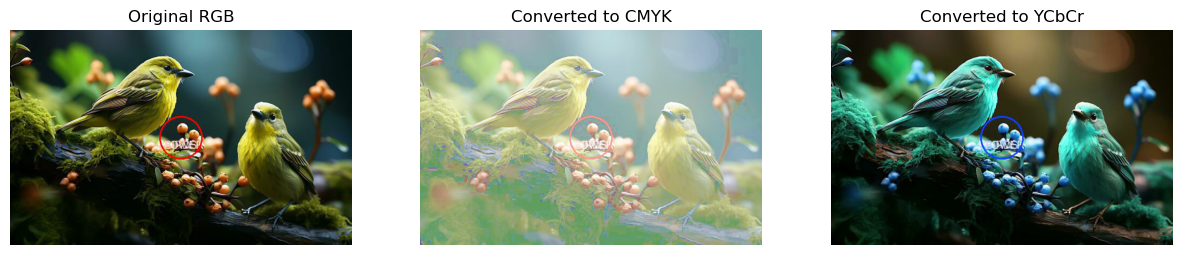

In [4]:
from PIL import Image
import numpy as np
import colorsys
import matplotlib.pyplot as plt

def rgb_to_cmyk(r, g, b):
    """Convert RGB to CMYK."""
    if (r == 0) and (g == 0) and (b == 0):
        # Black
        return 0, 0, 0, 100

    # RGB [0, 255] -> CMY [0, 1]
    c = 1 - r / 255.
    m = 1 - g / 255.
    y = 1 - b / 255.

    # Extract out K [0, 1]
    min_cmy = min(c, m, y)
    c = (c - min_cmy) / (1 - min_cmy)
    m = (m - min_cmy) / (1 - min_cmy)
    y = (y - min_cmy) / (1 - min_cmy)
    k = min_cmy

    return int(c * 100), int(m * 100), int(y * 100), int(k * 100)

def rgb_to_ycrcb(r, g, b):
    """Convert RGB to YCrCb."""
    y = 0.299*r + 0.587*g + 0.114*b
    cr = (r - y) * 0.713 + 128
    cb = (b - y) * 0.564 + 128

    return int(y), int(cr), int(cb)

# Read the image
image_path = r"C:\Users\Lenovo\Pictures\birds.jpg"
image = Image.open(image_path)
image = image.convert('RGB')

# Create arrays to hold the converted values
cmyk_image = Image.new('CMYK', image.size)
ycrcb_image = Image.new('YCbCr', image.size)

# Convert each pixel
cmyk_data = []
ycrcb_data = []
for pixel in image.getdata():
    r, g, b = pixel
    cmyk_data.append(rgb_to_cmyk(r, g, b))
    ycrcb_data.append(rgb_to_ycrcb(r, g, b))

cmyk_image.putdata(cmyk_data)
ycrcb_image.putdata(ycrcb_data)

# Save the modified images
cmyk_image.save(r"dice.jpg")
ycrcb_image.save(r"dice.jpg")

# Display the original and converted images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image)
axs[0].set_title('Original RGB')
axs[0].axis('off')

axs[1].imshow(cmyk_image)
axs[1].set_title('Converted to CMYK')
axs[1].axis('off')

axs[2].imshow(ycrcb_image)
axs[2].set_title('Converted to YCbCr')
axs[2].axis('off')

plt.show()

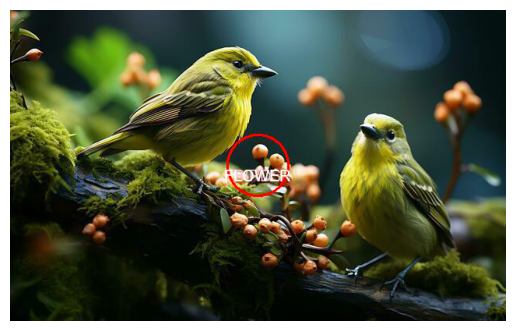

In [5]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Read the image
image_path = r"C:\Users\Lenovo\Pictures\birds.jpg"
image = Image.open(image_path)

# Get image dimensions
width, height = image.size

# Create a drawing context
draw = ImageDraw.Draw(image)

# Calculate center coordinates
center_x = width // 2
center_y = height // 2

# Define the radius of the circle
radius = min(width, height) // 10

# Draw the circle
draw.ellipse((center_x - radius, center_y - radius, center_x + radius, center_y + radius), outline="red", width=3)

# Load a font
# You may need to change the font path to a valid font file on your system
try:
    font_path = "C:\\Windows\\Fonts\\Arial.ttf"  # Change to a valid font path on your system
    font = ImageFont.truetype(font_path, 20)
except IOError:
    font = ImageFont.load_default()

# Define the text
text = "FLOWER"

# Calculate text size using getbbox
text_bbox = draw.textbbox((0, 0), text, font=font)
text_width = text_bbox[2] - text_bbox[0]
text_height = text_bbox[0] - text_bbox[1]

# Calculate text position
text_x = center_x - text_width // 2
text_y = center_y - text_height // 2

# Write the text inside the circle
draw.text((text_x, text_y), text, fill="White", font=font)

# Display the modified image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

# Save the modified image
save_path = r"C:\Users\Lenovo\Pictures\birds.jpg"
image.save(save_path)
